In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import os
import sys
from pathlib import Path

import sklearn
import numpy as np
import pandas as pd
from glob import glob

import matplotlib
import matplotlib.pyplot as plt

# Make all python scripts available in the path
sys.path.append('../')

import pp_utils
import lrn_crv_plot
from post_proc_from_serial import parse_args_file, parse_and_agg_scores
from ml_models import plot_prfrm_metrics

%matplotlib inline

filepath = Path(os.getcwd())
print(filepath)

Using TensorFlow backend.


/vol/ml/apartin/projects/LearningCurves/notebooks


In [ ]:
df = pd.read_csv(Path('/vol/ml/apartin/projects/LearningCurves/trn.gdsc/split_on_cell/multi_seed_rf_100_trees/all_seed_runs_scores.csv'))

In [24]:
fpath = Path('/vol/ml/apartin/projects/LearningCurves/hpo_runs/lc_gdsc_nn_reg0_hpo/run/id_217/output/data.nn_reg0.adam.cvf1.GE.DD.AUC_2019-11-7_h4-m5/cv1_sz213015/')
trn_logs = fpath / 'training.log'
h = plot_prfrm_metrics(logfile_path=trn_logs, skp_ep=0, outdir=fpath, add_lr=False)

In [46]:
fpath = Path('/vol/ml/apartin/projects/LearningCurves/hpo_runs/lc_gdsc_nn_reg0_hpo/run/id_057/output/data.nn_reg0.adam.cvf1.GE.DD.AUC_2019-11-4_h23-m21/cv1_sz88416/')
trn_logs = fpath / 'training.log'
h = plot_prfrm_metrics(logfile_path=trn_logs, skp_ep=0, outdir=fpath, add_lr=False)

In [28]:
fpath = Path('/vol/ml/apartin/projects/LearningCurves/trn.top6/split_on_cell/nn_reg_ap/run_03/cv0_sz213019/')
trn_logs = fpath / 'training.log'
h = plot_prfrm_metrics(logfile_path=trn_logs, skp_ep=0, outdir=fpath, add_lr=False)

In [30]:
n_runs = 20
digits = len(str(n_runs))

In [31]:
digits

2

In [57]:
# df = pd.read_csv(Path('/vol/ml/apartin/projects/LearningCurves/trn.gdsc/split_on_cell/multi_seed_lgbm_100_trees/all_seed_runs_scores.csv'))
df = pd.read_csv(Path('/vol/ml/apartin/projects/LearningCurves/trn.gdsc/split_on_cell/multi_seed_rf_100_trees/all_seed_runs_scores.csv'))
df = df[(df.metric=='mean_absolute_error') & (df.set=='te')].reset_index(drop=True)

In [ ]:
# df = pd.read_csv(Path('/vol/ml/apartin/projects/LearningCurves/trn.gdsc/split_on_cell/multi_seed_lgbm_100_trees/all_seed_runs_scores.csv'))
df = pd.read_csv(Path('/vol/ml/apartin/projects/LearningCurves/trn.gdsc/split_on_cell/multi_seed_rf_100_trees/all_seed_runs_scores.csv'))
df = df[(df.metric=='mean_absolute_error') & (df.set=='te')].reset_index(drop=True)

In [7]:
# df = pd.read_csv(Path('/vol/ml/apartin/projects/LearningCurves/trn.gdsc/split_on_cell/multi_seed_lgbm_100_trees/all_seed_runs_scores.csv'))
df = pd.read_csv(Path('/vol/ml/apartin/projects/LearningCurves/trn.top21/split_on_cell/top21.adam.nn_reg0.ge.dd.auc_2019-12-1/hpo_all.csv'))
# df = df[(df.metric=='mean_absolute_error') & (df.set=='te')].reset_index(drop=True)

In [10]:
cols = ['mean_absolute_error', 'tr_size']
df[cols]

,mean_absolute_error,tr_size
0,0.055923,392156
1,0.059719,131072
2,0.056969,262144
3,0.063548,65536
4,0.063102,32768


In [11]:
1779/239

7.443514644351464

In [9]:
2**13

8192

In [10]:
2**14

16384

In [81]:
def fn(a0, a1, n=30):
    m = np.linspace(a0, a1, n)
    m = np.array( [int(i) for i in m] )
    # print(m)
    return m

In [97]:
fn(a0=2**1, a1=2**8, n=40)

array([  2,   8,  15,  21,  28,  34,  41,  47,  54,  60,  67,  73,  80,
        86,  93,  99, 106, 112, 119, 125, 132, 138, 145, 151, 158, 164,
       171, 177, 184, 190, 197, 203, 210, 216, 223, 229, 236, 242, 249,
       256])

In [98]:
fn(a0=300, a1=2**14, n=40)

array([  300,   712,  1124,  1537,  1949,  2362,  2774,  3186,  3599,
        4011,  4424,  4836,  5248,  5661,  6073,  6486,  6898,  7310,
        7723,  8135,  8548,  8960,  9373,  9785, 10197, 10610, 11022,
       11435, 11847, 12259, 12672, 13084, 13497, 13909, 14321, 14734,
       15146, 15559, 15971, 16384])

In [102]:
fn(a0=2**15, a1=88000, n=10)

array([32768, 38904, 45041, 51178, 57315, 63452, 69589, 75726, 81863,
       88000])

In [155]:
fn(a0=2**1, a1=2**14, n=50)

array([    2,   336,   670,  1004,  1339,  1673,  2007,  2342,  2676,
        3010,  3345,  3679,  4013,  4348,  4682,  5016,  5351,  5685,
        6019,  6354,  6688,  7022,  7357,  7691,  8025,  8360,  8694,
        9028,  9363,  9697, 10031, 10366, 10700, 11034, 11369, 11703,
       12037, 12372, 12706, 13040, 13375, 13709, 14043, 14378, 14712,
       15046, 15381, 15715, 16049, 16384])

In [152]:
2**6

64

In [138]:
2 ** np.array(np.arange(30))[1:]

array([        2,         4,         8,        16,        32,        64,
             128,       256,       512,      1024,      2048,      4096,
            8192,     16384,     32768,     65536,    131072,    262144,
          524288,   1048576,   2097152,   4194304,   8388608,  16777216,
        33554432,  67108864, 134217728, 268435456, 536870912])

In [143]:
2 ** np.linspace(7, 14, 40)

array([  128.        ,   144.95760152,   164.16176748,   185.91012558,
         210.53973361,   238.43230319,   270.02011558,   305.79272122,
         346.30452679,   392.18338748,   444.14033753,   502.98060988,
         569.61611576,   645.07957755,   730.54053397,   827.32346574,
         936.92832244,  1061.05376886,  1201.62351104,  1360.81611005,
        1541.09874546,  1745.26545189,  1976.48042121,  2238.32704143,
        2534.86343231,  2870.68533843,  3250.99735443,  3681.69358621,
        4169.44899825,  4721.82286274,  5347.37591382,  6055.80302246,
        6858.08344837,  7766.65099747,  8795.58672194,  9960.83714955,
       11280.46142418, 12774.91118788, 14467.34754204, 16384.        ])

In [149]:
# m = 2 ** np.linspace(7, 14, 40)
m = 2 ** np.linspace(7, 14, 40)
m = np.array( [int(i) for i in m] )
m

array([  128,   144,   164,   185,   210,   238,   270,   305,   346,
         392,   444,   502,   569,   645,   730,   827,   936,  1061,
        1201,  1360,  1541,  1745,  1976,  2238,  2534,  2870,  3250,
        3681,  4169,  4721,  5347,  6055,  6858,  7766,  8795,  9960,
       11280, 12774, 14467, 16384])

In [2]:
import numpy as np
np.linspace(7, 14, 40)

array([ 7.        ,  7.17948718,  7.35897436,  7.53846154,  7.71794872,
        7.8974359 ,  8.07692308,  8.25641026,  8.43589744,  8.61538462,
        8.79487179,  8.97435897,  9.15384615,  9.33333333,  9.51282051,
        9.69230769,  9.87179487, 10.05128205, 10.23076923, 10.41025641,
       10.58974359, 10.76923077, 10.94871795, 11.12820513, 11.30769231,
       11.48717949, 11.66666667, 11.84615385, 12.02564103, 12.20512821,
       12.38461538, 12.56410256, 12.74358974, 12.92307692, 13.1025641 ,
       13.28205128, 13.46153846, 13.64102564, 13.82051282, 14.        ])

# Fine-grain run

In [116]:
main = Path('/vol/ml/apartin/projects/LearningCurves/trn.gdsc/split_on_none/fine_grain_lgb_subset')
def combine_runs(seed):
    r00 = pd.read_csv(main/seed/'run_00'/'lrn_crv_scores.csv')
    r01 = pd.read_csv(main/seed/'run_01'/'lrn_crv_scores.csv')
    r02 = pd.read_csv(main/seed/'run_02'/'lrn_crv_scores.csv')
    scores = pd.concat([r00, r01, r02], axis=0)
    return scores

In [126]:
seed = 'seed08'
scores = combine_runs(seed)
scores.to_csv(main/seed/'lrn_crv_scores.csv')

In [120]:
scr_00.tr_size.values

array([    2,     8,    14, ..., 76953, 82476, 88000])

## Response and goodness of fit

In [31]:
rsp = pd.read_csv(Path('../data/combined_single_response_agg'), sep='\t', engine='c', low_memory=False)
print(rsp.shape)
display(rsp[:2])

(4484080, 14)


,SOURCE,CELL,DRUG,STUDY,AUC,IC50,EC50,EC50se,R2fit,Einf,HS,AAC1,AUC1,DSS1
0,CCLE,CCLE.1321N1,CCLE.1,fake_exp,0.8330,4.883,5.183,0.5746,0.9864,0.2017,0.7463,0.1017,0.8983,0.0551
1,CCLE,CCLE.1321N1,CCLE.10,fake_exp,0.7909,5.217,5.217,2.2840,0.6526,0.0000,0.8993,0.1136,0.8864,0.0728


In [32]:
# Some responses have very bad fit
print('Total samples with R2fit<0:', rsp[rsp['R2fit']<0].shape[0])

# Keep a subset of responses
rsp = rsp[rsp['R2fit']>0]
print(rsp.shape)

Total samples with R2fit<0: 44661


(0, 1)

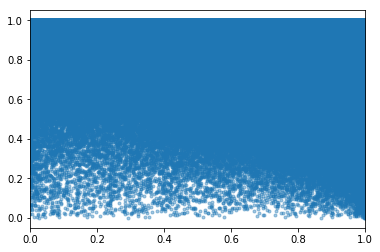

In [34]:
plt.plot(rsp['R2fit'], rsp['AUC'], '.', alpha=0.4)
# plt.xlim([0, 1])

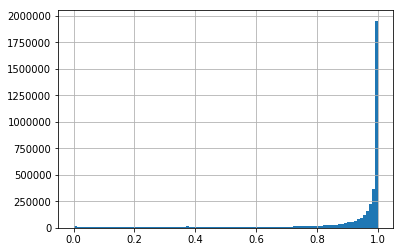

In [35]:
plt.hist(rsp['R2fit'], bins=100);
plt.grid(True)

In [41]:
r = rsp[rsp['EC50se'] < 100]
print(r.shape)

(3327420, 14)


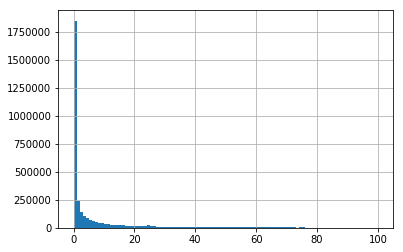

In [42]:
plt.hist(r['EC50se'], bins=100);
plt.grid(True)

## Compare (in)consistencies between Rick's and Harry's Top6 datasets

In [3]:
# Rick
xr = pd.read_parquet(Path('../../pilot1/data/processed/data_splits/top6_cv_simple/xdata.parquet'))
yr = pd.read_parquet(Path('../../pilot1/data/processed/data_splits/top6_cv_simple/ydata.parquet'))
print(xr.shape)
print(yr.shape)

(283152, 6212)
(283152, 1)


In [5]:
# Harry
xh = pd.read_parquet(Path('../top6_data_splits_/xdata.parquet'))
mh = pd.read_parquet(Path('../top6_data_splits_/meta.parquet'))
print(xh.shape)
print(mh.shape)

(285004, 6212)
(285004, 3)


In [11]:
xr[sorted(xr.columns)].head()

,DD_AAC,DD_AECC,DD_ALOGP,DD_ALOGP2,DD_AMR,DD_AMW,DD_AROM,DD_ARR,DD_ASP,DD_ATS1e,...,GE_ZMIZ1,GE_ZMYM2,GE_ZNF131,GE_ZNF274,GE_ZNF318,GE_ZNF395,GE_ZNF451,GE_ZNF586,GE_ZNF589,GE_ZW10
0,1.776,23.538,10.495,110.149,256.841,8.123,0.0,0.338,0.0,4.875,...,0.142000,-0.7695,-0.4844,-0.6543,-1.44600,-0.8420,-0.355500,-0.47530,-1.3390,-0.4937
1,1.776,23.538,10.495,110.149,256.841,8.123,0.0,0.338,0.0,4.875,...,0.532700,0.6830,0.0725,0.2411,-0.26150,-0.1866,-0.299600,1.35450,1.3560,1.5620
2,1.776,23.538,10.495,110.149,256.841,8.123,0.0,0.338,0.0,4.875,...,0.005966,-0.4277,-0.4485,-0.1606,0.02827,-0.5300,0.073000,-0.05112,-0.2966,-0.1231
3,1.776,23.538,10.495,110.149,256.841,8.123,0.0,0.338,0.0,4.875,...,-0.444300,-0.6230,-0.7360,0.3904,-0.68260,-1.5740,-0.392800,1.16100,-0.5810,-0.3252
4,1.776,23.538,10.495,110.149,256.841,8.123,0.0,0.338,0.0,4.875,...,0.243900,0.2925,0.2522,-0.9067,0.60740,0.6090,-0.001514,-0.20860,0.5770,0.4160


In [12]:
xh[sorted(xh.columns)].head()

,DD_AAC,DD_AECC,DD_ALOGP,DD_ALOGP2,DD_AMR,DD_AMW,DD_AROM,DD_ARR,DD_ASP,DD_ATS1e,...,GE_ZMIZ1,GE_ZMYM2,GE_ZNF131,GE_ZNF274,GE_ZNF318,GE_ZNF395,GE_ZNF451,GE_ZNF586,GE_ZNF589,GE_ZW10
0,1.895,5.357,0.052,0.003,47.659,9.709,0.0,0.333,0.0,3.208,...,3.855,2.140,1.472,2.960,0.4844,3.002,1.4260,1.736,1.1030,1.863
1,1.483,12.559,4.887,23.886,222.539,6.932,0.0,0.239,0.0,4.863,...,1.213,1.760,2.250,2.904,2.2230,1.640,1.6130,1.268,0.7886,2.148
2,1.991,9.815,2.776,7.703,97.796,10.506,0.0,0.552,0.0,3.884,...,1.640,2.900,0.726,2.088,0.7876,1.616,1.5205,0.907,1.2990,1.137
3,1.840,7.762,-1.515,2.297,69.605,8.259,0.0,0.435,0.0,3.767,...,2.492,2.902,1.343,2.025,2.5700,2.432,2.1330,1.241,1.6040,1.788
4,1.885,9.417,5.905,34.873,110.533,13.864,0.0,0.462,0.0,3.673,...,1.956,3.140,1.591,2.854,2.1800,2.914,2.2700,1.592,1.8820,2.781


In [3]:
def parse_and_agg_scores(run_path, hp=[], missing_runs=[], scores_fname='scores.csv'):    
    """ This func takes a dir of a single run of learning curves, extracts and aggregates
    scores for each training set size into a single structure. """
    # Choose the smallest fold out of available folds
    if len(sorted(run_path.glob('**/cv0*sz*')))==0:
        return hp, missing_runs
    
    fold = np.unique( sorted([str(r).split('/cv')[-1].split('_')[0] for r in sorted(run_path.glob('**/cv0_sz*'))]) )[0]
    sz_dirs = sorted( run_path.glob(f'**/cv{fold}*sz*') )
    
    lrn_crv_scores = []
    
    for sz_dir in sz_dirs:
        path_scores = sz_dir / scores_fname
        print(path_scores)
        
        if path_scores.exists(): # check if scores exist (some trainings may not have completed)
            scr = pd.read_csv( path_scores )
            tr_size = int( str(sz_dir).split('sz')[-1] )
            # aa = scr.loc[ scr['set']=='te', ['metric', 'fold1'] ].reset_index(drop=True) # Note! Gets only the first fold!
            fold_col_name = sorted( [c for c in scr.columns if 'fold' in c] )[0]
            aa = scr.loc[ scr['set']=='te', ['metric', fold_col_name] ].reset_index(drop=True) # Note! Gets only the first fold!
            aa = {aa.loc[i, 'metric']: aa.loc[i, fold_col_name] for i in range(aa.shape[0])}
            aa['tr_size'] = tr_size
            
            # Agg scores from each sz to master table
            lrn_crv_scores.append(scr)

            # Read and parse args
            # path_args = sz_dir / 'model_args.txt'
            path_args = sz_dir / 'args.txt'
            if path_args.exists():
                args = parse_args_file(path_args)
                aa.update(args) # combine scores with args
            else:
                # If (some reason) the args file was not found, results are useless.
                # Don't record the results but just continue.
                continue

            # If keras model, get the early stop epoch
            if (sz_dir/'krs_history.csv').exists():
                h = pd.read_csv( sz_dir/'krs_history.csv' )
                aa['epoch_stop'] = h['epoch'].max()        

            # Append results to the global list
            hp.append(aa)
        else:
            missing_runs.append(str(sz_dir))
            print(f'{scores_fname} does not exist.')
            print('continue')
            
    lrn_crv_scores = pd.concat(lrn_crv_scores, axis=0)
    lrn_crv_scores = lrn_crv_scores.sort_values(['set', 'metric', 'tr_size']).reset_index(drop=True)
            
    return hp, missing_runs, lrn_crv_scores

In [7]:
path = Path('/vol/ml/apartin/projects/LearningCurves/trn.top6/split_on_none/nn_reg0/run_07')
scores, missing_runs, lrn_crv_scores = parse_and_agg_scores(path, scores_fname='scores.csv')

/vol/ml/apartin/projects/LearningCurves/trn.top6/split_on_none/nn_reg0/run_07/cv0_sz1024/scores.csv
/vol/ml/apartin/projects/LearningCurves/trn.top6/split_on_none/nn_reg0/run_07/cv0_sz128/scores.csv
/vol/ml/apartin/projects/LearningCurves/trn.top6/split_on_none/nn_reg0/run_07/cv0_sz131072/scores.csv
/vol/ml/apartin/projects/LearningCurves/trn.top6/split_on_none/nn_reg0/run_07/cv0_sz16384/scores.csv
/vol/ml/apartin/projects/LearningCurves/trn.top6/split_on_none/nn_reg0/run_07/cv0_sz2048/scores.csv
/vol/ml/apartin/projects/LearningCurves/trn.top6/split_on_none/nn_reg0/run_07/cv0_sz213015/scores.csv
/vol/ml/apartin/projects/LearningCurves/trn.top6/split_on_none/nn_reg0/run_07/cv0_sz256/scores.csv
/vol/ml/apartin/projects/LearningCurves/trn.top6/split_on_none/nn_reg0/run_07/cv0_sz32768/scores.csv
/vol/ml/apartin/projects/LearningCurves/trn.top6/split_on_none/nn_reg0/run_07/cv0_sz4096/scores.csv
/vol/ml/apartin/projects/LearningCurves/trn.top6/split_on_none/nn_reg0/run_07/cv0_sz512/scores.c

In [8]:
path/'lrn_crv_scores.csv'

PosixPath('/vol/ml/apartin/projects/LearningCurves/trn.top6/split_on_none/nn_reg0/run_07/lrn_crv_scores.csv')

In [9]:
lrn_crv_scores.to_csv(path/'lrn_crv_scores.csv', index=False)

In [10]:
te = lrn_crv_scores[lrn_crv_scores.set=='te'].reset_index(drop=True)
te.to_csv(path/'te_lrn_crv_scores.csv', index=False)

vl = lrn_crv_scores[lrn_crv_scores.set=='vl'].reset_index(drop=True)
vl.to_csv(path/'vl_lrn_crv_scores.csv', index=False)

tr = lrn_crv_scores[lrn_crv_scores.set=='tr'].reset_index(drop=True)
tr.to_csv(path/'tr_lrn_crv_scores.csv', index=False)